In [4]:
load('Hamming Distance PolyFit mu= 10^(-5) constant Env final.mat');


In [5]:
average_Slope = mean(phat)
average_ci = mean(ci,1)
se_avgs = sqrt((abs((1-average_Slope).*(average_Slope)))./N);
ci_plus_avgs = average_Slope + alpha*se_avgs;
ci_minus_avgs = average_Slope - alpha*se_avgs;
ci_avgs = [ci_minus_avgs, ci_plus_avgs]

average_Slope =

   -0.0263


average_ci =

   -0.0364   -0.0161


ci_avgs =

   -0.0365   -0.0161

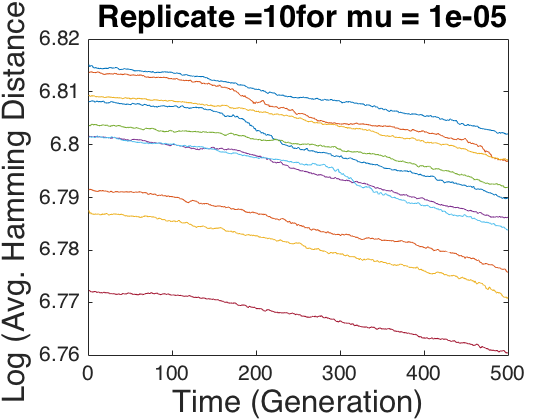

In [6]:
x2=1:length(avg_hamming_dist);
y2=avg_hamming_dist;
y3=log(avg_hamming_dist);
plot(x2,y3)
a = [' Replicate =', num2str(num_reps),' for mu = ', num2str(mu_1),'' ];
title(a, 'FontSize', fontSize);
ylabel('Log (Avg. Hamming Distance)', 'FontSize', fontSize);
xlabel('Time (Generation)', 'FontSize', fontSize);

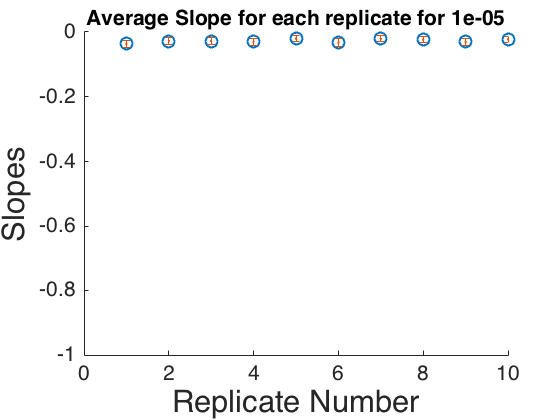

phat =

   -0.0369
   -0.0278
   -0.0278
   -0.0303
   -0.0207
   -0.0329
   -0.0213
   -0.0236
   -0.0305
   -0.0225


ci =

   -0.0491   -0.0248
   -0.0383   -0.0174
   -0.0383   -0.0173
   -0.0412   -0.0193
   -0.0297   -0.0117
   -0.0443   -0.0215
   -0.0305   -0.0122
   -0.0333   -0.0140
   -0.0414   -0.0195
   -0.0319   -0.0131

In [26]:
for z = 1:num_reps
        eval(sprintf('x%d = 1:(time);', z));
        %eval(sprintf('x%dz%d = ((j-1)*m):((j-1)*m + m-2);', j,z)); %in order to keep the indices  the same {199,299,399,499} are not included
        eval(sprintf('y%d =avg_hamming_dist(z,:);',z));
        eval(sprintf('p%d = polyfit(x%d,y%d, 1);', z,z,z));
        eval(sprintf('q%d = polyder(p%d);', z,z));
        eval(sprintf('f%d = polyval(p%d,x%d);', z,z,z));
        eval(sprintf('yfit%d = p%d(1) * x%d + p%d(2);', z,z,z,z));
        %eval(sprintf('yfit%dz%d = p%dz%d(1) * x%dz%d + p%dz%d(2) * x%dz%d.^2 + p%dz%d(3) * x%dz%d + p%dz%d(4);', j,z));
        eval(sprintf('yresid%d = y%d - yfit%d;', z,z,z));
        eval(sprintf('SSresid%d = sum(yresid%d.^2);', z,z));
        eval(sprintf('SStotal%d = (length(y%d)-1)* var(y%d);', z,z,z));
        eval(sprintf('rsq%d = 1 - SSresid%d/SStotal%d;', z,z,z));
        %eval(sprintf('rsq_adj%d = 1 - SSresid%d/SStotal%d*(length(y%d)-1)/(length(y%d)-length(p%d)); ', z));
end

slopes = zeros(num_reps,1);
rsq_matrix = zeros(num_reps,1);

for z = 1:num_reps
    
    eval(sprintf('slopes(z,1) = q%d;', z));  
    eval(sprintf('rsq_matrix(z,1) = rsq%d;', z));    
   
    %eval(sprintf('slopes_r%d = sum(slopes(z,:),2)/(time/m);', z));
    %eval(sprintf('rsq_r%d = sum(rsq_matrix(z,:),2)/(time/m);', z));
end


%slopes_r1 = sum(slopes(1,:),2)/(time/m);%slopes_r2 = sum(slopes(2,:),2)/(time/m);%slopes_r3 = sum(slopes(3,:),2)/(time/m);
%slopes_r4 = sum(slopes(4,:),2)/(time/m);%slopes_r5 = sum(slopes(5,:),2)/(time/m);%slopes_r6 = sum(slopes(6,:),2)/(time/m);
%slopes_r7 = sum(slopes(7,:),2)/(time/m);%slopes_r8 = sum(slopes(8,:),2)/(time/m);%slopes_r9 = sum(slopes(9,:),2)/(time/m);
%slopes_r10 = sum(slopes(10,:),2)/(time/m);
phat =[slopes(1,1);slopes(2,1); slopes(3,1); slopes(4,1);slopes(5,1);
       slopes(6,1); slopes(7,1); slopes(8,1);slopes(9,1); slopes(10,1)]
%phat =[q1;q2; q3; q4;q5;q6; q7; q8;q9; q10]
se = sqrt((abs((1-phat).*(phat)))./N);
ci_plus = phat + alpha*se;
ci_minus = phat - alpha*se;
ci = [ci_minus, ci_plus]
ci_dist_slope = (alpha*se);
figure
hold on;
scatter([1:length(slopes(:,1))],phat)
errorbar([1:length(slopes(:,1))],phat, ci_dist_slope,'.')
a = [ 'Average Slope for each replicate for ', num2str(mu_1),'' ];
title(a, 'FontSize', 10);
xlabel('Replicate Number', 'FontSize', fontSize);
ylabel('Slopes', 'FontSize', fontSize);
axis([0 10 -1 0]);

In [8]:
average_Slope = mean(phat)
se_avgs = sqrt((abs((1-average_Slope).*(average_Slope)))./N);
ci_plus_avgs = average_Slope + alpha*se_avgs;
ci_minus_avgs = average_Slope - alpha*se_avgs;
ci_avgs = [ci_minus_avgs, ci_plus_avgs]

average_Slope =

   -0.0274


average_ci =

   -0.0378   -0.0171


ci_avgs =

   -0.0378   -0.0170

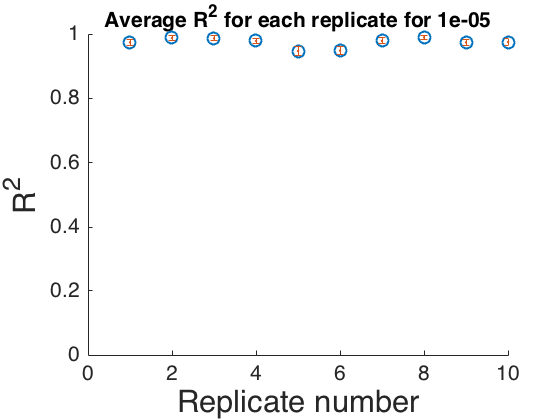

phat_rsq =

    0.9738
    0.9877
    0.9867
    0.9785
    0.9471
    0.9486
    0.9788
    0.9895
    0.9737
    0.9749


ci_rsq =

    0.9639    0.9837
    0.9809    0.9946
    0.9797    0.9938
    0.9695    0.9875
    0.9332    0.9610
    0.9350    0.9623
    0.9699    0.9878
    0.9832    0.9958
    0.9638    0.9836
    0.9652    0.9846

In [23]:
{phat_rsq =[rsq1;rsq2; rsq3; rsq4;rsq5;rsq6; rsq7; rsq8;rsq9; rsq10]
se_rsq = sqrt((abs((1-phat_rsq).*(phat_rsq)))./N);
ci_plus_rsq = phat_rsq + alpha*se_rsq;
ci_minus_rsq = phat_rsq - alpha*se_rsq;
ci_rsq = [ci_minus_rsq, ci_plus_rsq]
ci_dist_slope = (alpha*se_rsq);
figure
hold on;
scatter([1:length(rsq_matrix(:,1))],phat_rsq)
errorbar([1:length(rsq_matrix(:,1))],phat_rsq,ci_dist_slope,'.')
a = [ 'Average R^{2} for each replicate for ', num2str(mu_1),''];
title(a, 'FontSize', 10);
xlabel('Replicate number', 'FontSize', fontSize);
ylabel('R^{2}', 'FontSize', fontSize);
axis([0 10 0 1]);}

In [19]:
average_Slope = mean(phat)
se_avgs = sqrt((abs((1-average_Slope).*(average_Slope)))./N);
ci_plus_avgs = average_Slope + alpha*se_avgs;
ci_minus_avgs = average_Slope - alpha*se_avgs;
ci_avgs = [ci_minus_avgs, ci_plus_avgs]

average_Slope =

   -0.0274


ci_avgs =

   -0.0378   -0.0170

In [25]:
sum([0 1 1 1 0],2)

ans =

     3